In [7]:
import data_analysis as data_analysis

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

In [8]:
data_location = "../data/scenariosa/InteractiveSentimentDataset/"
labels_location = "../data/scenariosa/labels.txt"

In [3]:
train, valid, test = data_analysis.text2dataframe_scenarioSA(data_location)

reading conversations: 100%|██████████████████████████████████████████████████| 2214/2214 [01:16<00:00, 28.81it/s]


In [4]:
train.head()

,conv_id,speaker,text,label
3662,304,A,"I can't stay here, though.",0
23547,131,A,How much do the roses cost?,1
15365,2132,B,Of course! Will you?,2
12613,427,A,"If she's so unhappy, she should find another job.",0
3732,311,B,I need help finding a new refrigerator.,1


In [15]:
with open(labels_location, "r") as fp:
    labels = [line.strip() for line in fp.readlines()]
    emotions = {labels[i]: i for i in range(len(labels))}
    
emotions

{'negative': 0, 'neutral': 1, 'positive': 2}

In [19]:
def split_corpus_by_emotion(emotions, dataframe):
    emotions_corpus_dict = {}

    for emotion in emotions:
        emotions_corpus_dict[emotion] = []

        # only select portion of the corpus correspondent to the specified emotion
        emotion_df = dataframe[dataframe['label'] == emotion]
        emotion_corpus = emotion_df['text'].values

        for utterance in emotion_corpus:
            emotions_corpus_dict[emotion].append(utterance.strip())
            
    return emotions_corpus_dict

emotions_corpus_dict = split_corpus_by_emotion(list(emotions.values()), train)
emotions_corpus_dict_dev = split_corpus_by_emotion(list(emotions.values()), valid)
emotions_corpus_dict_test = split_corpus_by_emotion(list(emotions.values()), test)
        
emotions_corpus_dict[0][:5]

["I can't stay here, though.",
 "If she's so unhappy, she should find another job.",
 'A pipe burst in my ceiling.',
 "It's too late.",
 "I had to say something since we're roommates and I'm tired of cleaning her mess."]

### Balancing

In [20]:
for emotion in emotions_corpus_dict:
    print(len(emotions_corpus_dict[emotion]))

2601
8378
3460


[0 1 2]


/Users/isabeldias/Documents/Envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


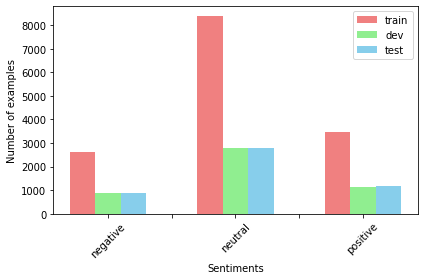

In [29]:
x = np.arange(len(list(emotions.values())))
print(x)

ax = plt.subplot(111)
ax.bar(x-0.2, [len(emotions_corpus_dict[emotion]) for emotion in emotions_corpus_dict], width=0.2, color='lightcoral', label='train')
ax.bar(x, [len(emotions_corpus_dict_dev[emotion]) for emotion in emotions_corpus_dict], width=0.2, color='lightgreen', label='dev')
ax.bar(x+0.2, [len(emotions_corpus_dict_test[emotion]) for emotion in emotions_corpus_dict], width=0.2, color='skyblue', label='test')
ax.set_xticklabels(['0','negative', '', 'neutral', '', 'positive'], rotation=45)
ax.legend()

plt.ylabel('Number of examples')
plt.xlabel('Sentiments')

plt.tight_layout()

plt.savefig("balancing_scenariosa.jpeg", dpi=300)